In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer.pitch import Pitch, VerticalPitch
import matplotlib.patches as mpatches
import seaborn as sns  # data vizualisation library





In [3]:
df = pd.read_csv("C:/Users/lione/Documents/Entrainement _logiciels/Python/messibetis.csv")  # Importation du fichier csv

C:\Users\lione\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(8, 68, 'Game direction')

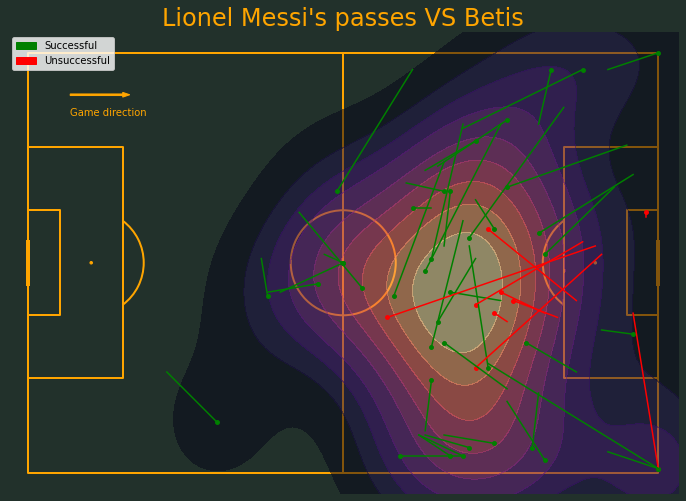

In [4]:
# Coversion des coordonnées (pour que ça coïncide avec le terrain).
df['x'] = df['x']*1.2
df['endX'] = df['endX']*1.2
df['y'] = df['y']*0.8
df['endY'] = df['endY']*0.8

fig = plt.figure(figsize=(13, 8.5))  # parfois, on peut voir : fig, ax = plt.subplots=((figsize=...))
ax = fig.add_subplot(111)
fig.set_facecolor("#22312b")  # couleur de l'arrière plan (tout ce qui est en dehors du graphe)
ax.patch.set_facecolor("#22312b") # couleur de l'arrière plan du graphe


# Création du terrain
pitch = Pitch(half=False, pitch_color="#22312b", line_color="orange")  # half : moitié du terrain

# Dessiner le terrain
pitch.draw(ax=ax)  # Ici, nous voulons que le terrain prenne la taille du graphe (ax)

# Quand le terrain est à l'hozizontal, la graduation de l'axe de l'ordonnée est inversée
# (0 est en haut à gauche et la plus grande valeur est en bas à gauche)
# On va donc inverser l'axe Y.
plt.gca().invert_yaxis()

# Create the heatmap
kde = sns.kdeplot(
    df['x'],
    df['y'],
    shade=True,  # Remplissage des couleurs des différentes couches
    shade_lowest=False,
    alpha=.5,
    n_levels=10,  # nombre de couches pour la heatmap
    cmap='magma',  # Couleur style magma
    # cbar = True => bar de couleur pour la légende



)





# On trace les passes réussies/ratées
for i in range(len(df['x'])):
    if df['outcome'][i] == "Successful":
        plt.plot((df['x'][i], df['endX'][i]), (df['y'][i], df['endY'][i]), "green")
        # on relie le point A qui a pour coordonnées la ième valeur de df['x"] en abscisse et ... ordonnée
        # avec le point B ((df[endX), df[endY])


        # On dessine un point au niveau du point de départ de la passe.
        plt.scatter(df['x'][i], df['y'][i], c="green", s=15)
    else:
        plt.plot((df['x'][i], df['endX'][i]), (df['y'][i], df['endY'][i]), "red")
        plt.scatter(df['x'][i], df['y'][i], c="red", s=15)

# Légende
red_patch = mpatches.Patch(color='red', label='Unsuccessful')
green_patch = mpatches.Patch(color='green', label='Successful')
plt.legend(handles=[green_patch, red_patch], loc="upper left")


# Titre sur figure :
plt.title("Lionel Messi's passes VS Betis", fontsize=24, c='orange')

plt.arrow(8, 72, 10, 0, width=0.3, color="orange")  

# Texte en-dessous de la flèche
plt.text(8, 68, "Game direction", color="orange" )